# TITANIC

### Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Dataset

### Cargar base de datos

In [2]:
data = pd.read_csv("D:/DATASET/titanic.csv")
data_main = data.copy()    #Copia original 

### Dimensiones

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> sibsp Number of Siblings/Spouses Aboard

> parch Number of Parents/Children Aboard

In [4]:
data.shape

(891, 12)

 >  891 Personas 
 
 > 12 variables

In [5]:
n = data.shape[1]       #Numero de pasajeros

# Descripción de los datos

### Tipos de variables 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> 5 Variables categóricas 

> 7 Variables cuantitativas

### Valores nulos 

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Hay 3 variables con valores nulos; en Edad Cabin y Embarked

In [8]:
data.Cabin.unique()        #Observar valores únicos de la variable "Cabin"

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [9]:
data.drop("Cabin", axis=True, inplace=True)

Dado que no se posee mayor información del código de cabina y al alto numero de NAs se puede prescindir de esta variable

In [10]:
data.Embarked.unique()          #Observar valores únicos de la variable "Embarked"

array(['S', 'C', 'Q', nan], dtype=object)

- La variable Embarked en cambio posee solo 3 zonas donde embarcaron los pasajeros, por lo cual si puede ser de utilidad. Solo existen dos valores nulos luego podrán eliminarse directamente o rellenar con most comount value

In [11]:
data.Embarked.value_counts()          #Observar la frecuencia de valores nulos de la variable "Embarked"

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Dado que es una variable bastante desbalanceada se cambiarán los valores nulos por el más comun "S"

In [12]:
data["Embarked"].fillna("S", inplace=True)      #Rellenar valores nulos con "S"

### Tipos de datos en cada variable 

In [13]:
#Mostrar valores únicos de cada columna
data.apply(lambda x: pd.Series(pd.unique(x))).fillna('').head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,0,1,PC 17599,71.2833,C
2,3,,2,"Heikkinen, Miss. Laina",,26,3,2,STON/O2. 3101282,7.925,Q
3,4,,,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",,35,4,5,113803,53.1,
4,5,,,"Allen, Mr. William Henry",,,2,3,373450,8.05,


>  La variable "Passengerid es similar al index, luego también puede eliminarse

> La variable "Ticket" y "Name" no aportan información, se elimina.

In [14]:
data.drop(["PassengerId","Ticket","Name"], axis=1, inplace=True)  #Borrar columnas PassengerId, Ticket, Name

- Eliminando columnas innecesarias la base de datos se reduce a 8 variables:

In [15]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Distribución de los datos 

### Supervivientes

0    549
1    342
Name: Survived, dtype: int64

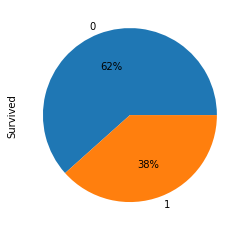

In [16]:
X1 = data.Survived
X1.value_counts().plot.pie(autopct='%1.0f%%');
plt.style.use("ggplot")
X1.value_counts()

> Sobrevivien 342 personas, el 38% de los pasajeros

### Supervivientes y Sexo

In [17]:
pd.crosstab(data.Survived, data.Sex, normalize=1)    # Tabla de frecuencias con porcentajes

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


In [18]:
data.Sex.value_counts()             # Frecuencias de variable Sexo

male      577
female    314
Name: Sex, dtype: int64

>  Habian 577 hombres y 314 mujeres en el barco

> Sobrevivien el 74,2% de las mujeres mientras que  solo el 18,8 % de los hombres

### Supervivientes y Edad

In [19]:
data.Age.sort_values() 

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
       ... 
859     NaN
863     NaN
868     NaN
878     NaN
888     NaN
Name: Age, Length: 891, dtype: float64

¿Edad 0.42? ¿Bebés?

> Primero rellenamos los NAN con media de columna:

In [20]:
data.Age.fillna(data.Age.mean(), inplace=True)

> Vamos a crear una nueva variable que represente grupos de edad

In [21]:
cortes = [0,1,4,13,18,25,70,100]
niveles = ["bebe","infante","niño","adolescente","joven","adulto","anciano"]
data["grupo_edad"] = pd.cut(data.Age, bins= cortes, labels = niveles, right=False)

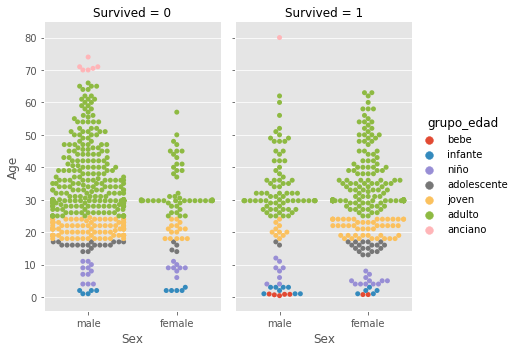

In [22]:
sns.catplot(data=data,x="Sex", y="Age", hue="grupo_edad",col="Survived", aspect=.6,
            kind="swarm");

> De aquí se pueden sacar muchas conclusiones:
- Todos los bebés sobreviven
- Sobreviven más mujeres que hombres
- A diferencia de uno(outlier), todos los ancianos mueren

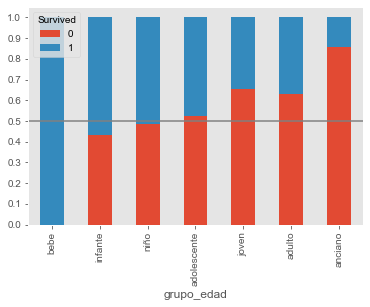

In [23]:
def graph_categorical(serie_1, serie_2):
    "Muestra un gráfico de barras stackeado con porcentajes"
    ct = pd.crosstab(serie_1,serie_2,normalize=0)
    ct.plot.bar(stacked=True)
    plt.yticks(np.arange(0,1.1,0.1))
    plt.axhline(y=0.5, color='grey', linestyle='-')
    plt.style.use("ggplot")
    sns.set_style("white")
    plt.grid()
    plt.show()
    
graph_categorical(data.grupo_edad,data.Survived)

> En este gráfico se muestra el % de supervivientes para cada grupo de edad, se observa que:
- Sobrevivien el 100% de bebés 
- A medida que se aumenta en el grupo de edad se sobrevive menos a diferencia de joven-adulto

### Supervivientes y Clase / Fare

- ¿Sobrevivir está relacionado con el precio del billete?

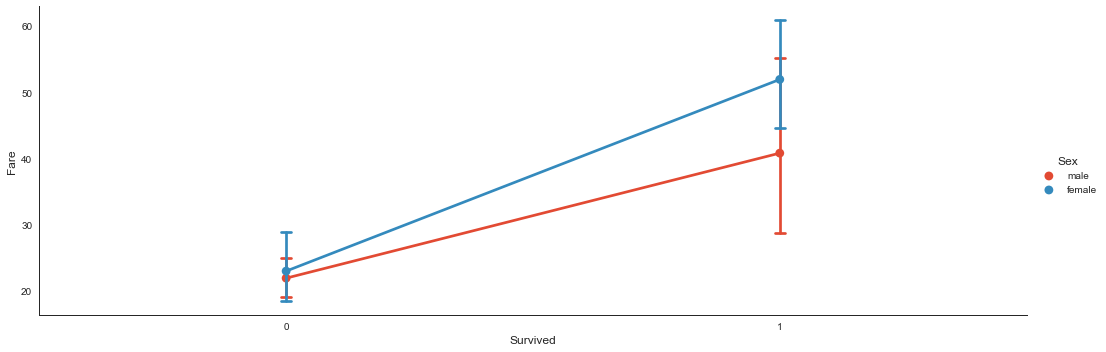

In [24]:
g = sns.catplot(data = data, kind = "point", x = "Survived", y = "Fare", hue="Sex", height=5,aspect=2.9, join=True,capsize=0.02)

> Conclusiones:
- La media del precio del billete de los supervivientes es muy superior a los no supervivientes
- La media del precio del billete de mujeres es superior al de hombres

- ¿Sobrevivir está relacionado con la clase? 

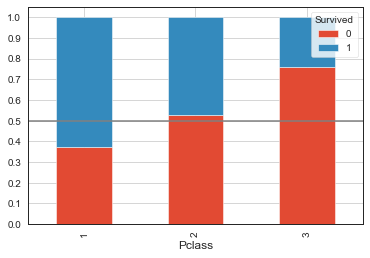

In [25]:
def graph_categorical(serie_1, serie_2):
    "Muestra un gráfico de barras stackeado con porcentajes"
    ct = pd.crosstab(serie_1,serie_2,normalize=0)
    ct.plot.bar(stacked=True)
    plt.yticks(np.arange(0,1.1,0.1))
    plt.axhline(y=0.5, color='grey', linestyle='-')
    plt.style.use("ggplot")
    sns.set_style("white")
    plt.grid()
    plt.show()
    
graph_categorical(data.Pclass,data.Survived)

> Claramente sí, a medida que se disminuye en la clase, aumenta la probabilidad de no Sobrevivir

### Correlaciones lineales

In [26]:
def top_correlation (df,n):
    corr_matrix = df.corr()
    correlation = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
    correlation = pd.DataFrame(correlation).reset_index()
    correlation.columns=["Variable_1","Variable_2","Correlacion"]
    correlation = correlation.reindex(correlation.Correlacion.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
    return correlation.head(n)
    
top_correlation(data,10)


,Variable_1,Variable_2,Correlacion
0,Pclass,Fare,-0.549500
1,SibSp,Parch,0.414838
2,Survived,Pclass,-0.338481
3,Pclass,Age,-0.331339
4,Survived,Fare,0.257307
5,Age,SibSp,-0.232625
6,Parch,Fare,0.216225
7,Age,Parch,-0.179191
8,SibSp,Fare,0.159651
9,Age,Fare,0.091566


> Correlaciones lineales:
- Por supuesto la clase y el precio de billete estan correlacionados
- El numero de familiares a bordo (viajar en familia) también
- Relación negativa entre edad y clase; A mayor adultez mayor dinero

Datos curiosos: 
- Sobrevivien los jovenes antes que los adultos
- Sobreviven los que han pagado más

...sin embargo los adultos son los que más han pagado.

# Pre-procesado de datos

### Seleccionar variables

In [27]:
X = data.drop("Survived",axis=1)
Y = data.Survived

columnas = X.columns

In [28]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,grupo_edad
0,3,male,22.0,1,0,7.2500,S,joven
1,1,female,38.0,1,0,71.2833,C,adulto
2,3,female,26.0,0,0,7.9250,S,adulto
3,1,female,35.0,1,0,53.1000,S,adulto
4,3,male,35.0,0,0,8.0500,S,adulto


## Categorical data

> Se deben clasificar en variables dummy las columnas Sex,Embarked y grupo_edad

In [29]:
#Aplicar get_dummies a todas las columnas categoricas
def dummy_data(df):
    
    columnas_transformar = df.select_dtypes(include=["object","category"]).columns
    
    print("Se codifican las siguientes variables: " + str(list(columnas_transformar)))
    for columna in columnas_transformar:
        df[columna]  = pd.Categorical(df[columna])
        df_transformed = pd.get_dummies(df, drop_first=True)      #Eliminar la primera por colinealidad
        
    
    return df_transformed

X = dummy_data(X)
X.head()


Se codifican las siguientes variables: ['Sex', 'Embarked', 'grupo_edad']


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,grupo_edad_infante,grupo_edad_niño,grupo_edad_adolescente,grupo_edad_joven,grupo_edad_adulto,grupo_edad_anciano
0,3,22.0,1,0,7.2500,1,0,1,0,0,0,1,0,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,1,0
2,3,26.0,0,0,7.9250,0,0,1,0,0,0,0,1,0
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,1,0
4,3,35.0,0,0,8.0500,1,0,1,0,0,0,0,1,0


# Feature selection

In [93]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

#Entrenar el modelo 
clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X, Y)
clf.feature_importances_ 


#Extraer las mejores del modelo
model = SelectFromModel(clf, prefit=True)
feature_idx = model.get_support()
feature_name = X.columns[feature_idx]
X_best = model.transform(X)
X_best = pd.DataFrame(X_best, columns= feature_name)

print(X.shape[1], X_best.shape[1])

14 4


In [94]:
X_best

,Pclass,Age,Fare,Sex_male
0,3.0,-0.592481,-0.502445,1.0
1,1.0,0.638789,0.786845,0.0
2,3.0,-0.284663,-0.488854,0.0
3,1.0,0.407926,0.420730,0.0
4,3.0,0.407926,-0.486337,1.0
...,...,...,...,...
886,2.0,-0.207709,-0.386671,1.0
887,1.0,-0.823344,-0.044381,0.0
888,3.0,0.000000,-0.176263,0.0
889,1.0,-0.284663,-0.044381,1.0


> De 14 variables nos quedamos solo con 4 

### Model-Selection

In [101]:
def model_selection (X,Y,tipo=None):
    n_cv = 5
    metrica = "accuracy"

    from warnings import filterwarnings
    filterwarnings('ignore')
    
    from sklearn.model_selection import cross_val_score
    if tipo=="Clasificación" or tipo=="Regresión":
        print("Trabajando...")
    else:
        print("Se debe especificar el problema: Clasificación o Regresión")
        

    if tipo=="Clasificación":
        
        #LOGREG
        from sklearn.linear_model import LogisticRegression
        logreg = LogisticRegression(max_iter=1000)
        logreg_cross = cross_val_score(logreg,X,Y,cv=n_cv, scoring=metrica)
        logreg_score = logreg_cross.mean()
        logreg_std = logreg_cross.std()
            
        #RANDOM FOREST
        from sklearn.ensemble import RandomForestClassifier
        forest = RandomForestClassifier(n_estimators=100)
        forest_cross = cross_val_score(forest,X,Y,cv=n_cv, scoring=metrica)
        forest_score = forest_cross.mean()
        forest_std = forest_cross.std()
        
        #K-Neighbors
        from sklearn.neighbors import KNeighborsClassifier
        knn = KNeighborsClassifier(n_neighbors=3)
        knn_cross = cross_val_score(knn,X,Y,cv=n_cv, scoring=metrica)
        knn_score = knn_cross.mean()
        knn_std = knn_cross.std()
            

         #Support Vector Machines
        from sklearn.svm import SVC
        SVM = SVC(probability=True)
        SVM_cross = cross_val_score(SVM,X,Y,cv=n_cv, scoring=metrica)
        SVM_score = SVM_cross.mean()
        SVM_std = SVM_cross.std()
        
        
        #MLP Clasificación sklearn
        from sklearn.neural_network import MLPClassifier
        MLP = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20,20,20), max_iter=1000)
        MLP_cross = cross_val_score(MLP,X,Y, cv=n_cv, scoring=metrica)
        MLP_score = MLP_cross.mean()
        MLP_std =  MLP_cross.std() 
        
        
        #Ensamble_Voting
        from sklearn.ensemble import VotingClassifier
        estimators = [("Regresión Logística",logreg),("Random Forest",forest),("K_Neighbors",knn),("SVM",SVM),("Red Neuronal",MLP) ]
        M_voting = VotingClassifier(estimators, voting= "soft")
        M_voting_cross = cross_val_score(M_voting,X,Y,cv=n_cv, scoring=metrica)
        M_voting_score = M_voting_cross.mean()
        M_voting_std = M_voting_cross.std()
        
        
        resultados = pd.DataFrame()  
        resultados["Modelo"]=["Regresión Logística","Bosques Aleatorios", "K-Neighbors","SVM","Red Neuronal","Ensamble: Voting"]
        resultados["Score"]=[logreg_score,forest_score, knn_score, SVM_score,MLP_score, M_voting_score]
        resultados["Desviación"]=[logreg_std,forest_std, knn_std, SVM_std,MLP_std, M_voting_std]
        resultados = resultados.sort_values(by="Score", ascending=False).reset_index(drop=True)
        
        
    
    print("")
    print("Resultados: ")    
    return resultados
        


best_model = model_selection(X_best,Y,tipo="Clasificación")
best_model

Trabajando...

Resultados: 


,Modelo,Score,Desviación
0,Ensamble: Voting,0.831668,0.009031
1,Bosques Aleatorios,0.809240,0.028795
2,K-Neighbors,0.803641,0.025150
3,SVM,0.797960,0.022908
4,Red Neuronal,0.794633,0.013228
5,Regresión Logística,0.787873,0.009784


> Model selection:
- El ensamble method ha conseguir la mejor puntuación
- Bosques aleatorios lo trata muy bien también

> Vamos a probar con bosques aleatorios  customizando hiperparámetros

### GridSearch: Random Forest

In [125]:
# RANDOM FOREST GRID SEARCH 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

#Modelo
model = RandomForestClassifier()

#Parámetros
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]




parameters = dict(n_estimators = n_estimators, 
                  max_features = max_features,
                  max_depth = max_depth, 
                  min_samples_split = min_samples_split, 
                  min_samples_leaf = min_samples_leaf, 
                  bootstrap = bootstrap)


param_search =RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter=20,cv=5, n_jobs=-1)
param_search.fit(X, Y)

#Modelo con mejores parámetros 

model = RandomForestClassifier(**param_search.best_params_)

scores = cross_val_score(model, X, Y,cv=5)
print('\033[1m'+"Predicción : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Predicción : 0.83 (+/- 0.08)


> Buscando los mejores hiperparámetros para Random forest conseguimos un Accuracy de 83%, no está mal